In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [15]:
import pandas as pd
import pydicom as dicom
import os

df = pd.read_csv('/home2/deephealth/labels/dh_dcm_ast_labels.csv')

print(df.to_string()) 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
df.head(10)

,StudyInstanceUID,CancerLaterality,Label
0,2.25.71795905176225505077283831366606491140,None,NonCancer
1,2.25.286742411503410351300959183644372118736,None,NonCancer
2,2.25.150933977719899271320279081103853990090,None,NonCancer
3,2.25.150933977719899271320279081103853990090,None,NonCancer
4,2.25.200981672260203837512420681453450979088,None,NonCancer
5,2.25.200981672260203837512420681453450979088,None,NonCancer
6,2.25.255308468547727111463338609241073687499,None,NonCancer
7,2.25.255308468547727111463338609241073687499,None,NonCancer
8,2.25.84709825699893675377534810592988247858,None,NonCancer
9,2.25.84709825699893675377534810592988247858,None,NonCancer


In [6]:
cancer = df['Label'] != 'NonCancer'

In [9]:
df[cancer].head(10)

,StudyInstanceUID,CancerLaterality,Label
14,2.25.112908407877419896602969124388808499489,L,IndexCancer
153,2.25.198719608875405833090532926816266255835,R,IndexCancer
320,2.25.109691155814604629361158576787947173447,R,PreIndexCancer
364,2.25.48254684939333569193551329291605207561,L,IndexCancer
407,2.25.66074960385199423626729612573197246395,L,PreIndexCancer
434,2.25.69748944223341141401385416413184176988,R,IndexCancer
444,2.25.266898653756245093727760510468116045610,L,IndexCancer
513,2.25.28492520456463662161551303603922150250,L,IndexCancer
613,2.25.240045940180111778443513026035029785355,R,IndexCancer
653,2.25.161012424716134382087088462035235684497,L,IndexCancer


In [10]:
import omama as O

In [12]:
threeD_data = O.Data('/raid/data01/deephealth/dh_dcm_ast/', timing=True)

...took  8.36302924156189 seconds


In [13]:
# example from above row 364, Laterality L
cancerstudy = '/raid/data01/deephealth/dh_dcm_ast/2.25.48254684939333569193551329291605207561/'

DXm.2.25.26139317295413698549229770698874461913
DXm.2.25.96548230324759366110094901111346521296
DXm.2.25.173598864538106813662370655162934266911
DXm.2.25.180750366621794481137734302472689372612
DXm.2.25.276065218268534022221047171351105582414
DXm.2.25.137798551014946711797478703918178438722
DXm.2.25.337815989660001484404403467468160632194
DXm.2.25.263874457130361731053694001519953892342
DXm.2.25.104826697237898034410233337140960810129
DXm.2.25.250395898956345937141709226055576751986


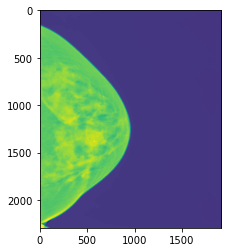

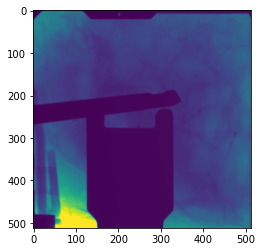

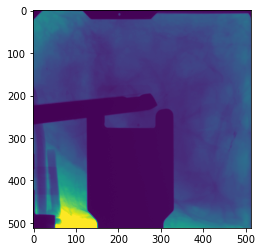

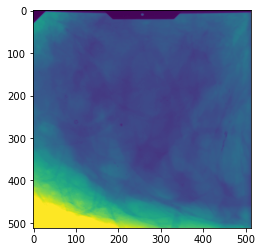

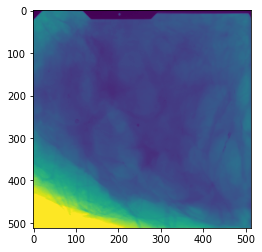

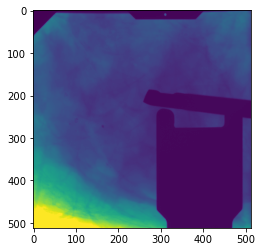

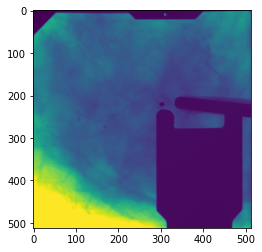

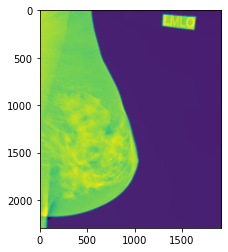

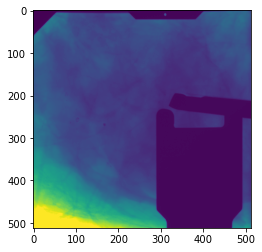

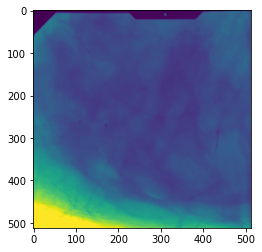

In [19]:
for c in os.listdir(cancerstudy):
    ds = dicom.dcmread(os.path.join(cancerstudy, c))
    if ds.get("ImageLaterality") == "L":
        print(c)
        plt.figure()
        imshow(ds.pixel_array)
        